# Data Retrieval


## Setup


In [4]:
# data handling
import pandas as pd
import numpy as np
from datetime import date

# path handling
import os
from pathlib import Path

# visualization
import plotly.graph_objects as go


## Data


In [17]:
# today's date
today_date = date.today().strftime("%d%b%Y")

# name of the files
file_name = f'spanish-covid-19-data-renave-{today_date}.csv'

# data path
base_dir = Path(os.getcwd()).parents[0]

# path to save last raw data
path_to_save_raw_data = base_dir / 'data' / 'raw-data' / file_name	

# path to save preprocessed data
path_to_save_processed_data = base_dir / 'data' / 'processed-data' / file_name	

# path to save final data
path_to_save_final_data = base_dir / 'data' / 'final-data' / file_name	

In [18]:
df = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv', 
                parse_dates=['fecha'], encoding='latin-1', keep_default_na=False)

# save raw data
df.to_csv(path_to_save_raw_data, index=False)
print(f'Updated raw data saved in {path_to_save_raw_data}')

Updated raw data saved in d:\MUMOMA\TFM\COVID\COVID-Dynamics-Model-Comparison\data\raw-data\spanish-covid-19-data-renave-02Jul2022.csv


In [23]:
# Data selection

def preprocess_data(df, smooth=True):
    df.drop(columns=['num_hosp', 'num_uci'], inplace=True)

    df.rename(columns={'provincia_iso':'ISO3',
            'fecha':'Date', 
            'num_casos':'Infected', 
            'num_def':'Deaths'}, inplace=True)
    # group by date to delete province data
    df = df.groupby(['Date']).sum()

    # add population
    df['Population'] = 46796540

    # select data for SI (Susceptible, Infected)
    df = df[['Population', 'Infected', 'Deaths']]

    if smooth is True:
        # smooth data
        df['Infected'] = df['Infected'].rolling(7).mean().dropna().astype(int)
        df['Deaths'] = df['Deaths'].rolling(7).mean().dropna().astype(int)

    # add recovered
    RECOVERY_PERIOD = 10
    df['Recovered'] = 0
    df['Recovered'].iloc[RECOVERY_PERIOD:] = df['Infected'].iloc[:-RECOVERY_PERIOD] - df['Deaths'].iloc[:-RECOVERY_PERIOD]

    # ensure not nan values
    df.dropna(inplace=True)

    # select positive data
    df = df[df.index > pd.to_datetime('2020-03-01')]

    return df

# preprocess
df = preprocess_data(df)
# save data
df.to_csv(path_to_save_processed_data, index=True)

# show data
df.tail()

C:\Users\maria\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Population,Infected,Deaths,Recovered
Date,,,,
2022-05-20,46796540,16002.0,66.0,15936.0
2022-05-21,46796540,15551.0,65.0,15486.0
2022-05-22,46796540,15096.0,64.0,15032.0
2022-05-23,46796540,14700.0,62.0,14638.0
2022-05-24,46796540,14270.0,61.0,14209.0


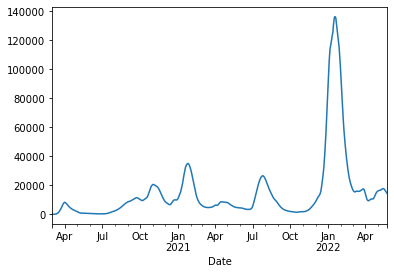

In [24]:
df['Infected'].plot()

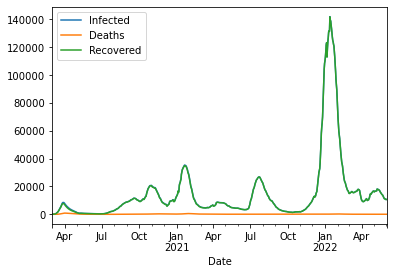

In [10]:
df.iloc[:, 1:].plot()

In [11]:
# save data
df.to_csv(path_to_save_final_data)
print(f'Updated final processed data saved in {path_to_save_final_data}')

Updated final processed data saved in d:\MUMOMA\TFM\COVID\COVID-Dynamics-Model-Comparison\data\final-data\spanish-covid-19-data-renave-02Jul2022.csv
